In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

# College Football API


## Data Import

In [2]:
from google.colab import drive
drive.mount('/content/drive')


df = pd.read_csv('/content/drive/My Drive/DAT 490/Main data source/cfbd_games_2014_2025.csv') #--Linh's folder/Works the same for Nick and Jack
#df = pd.read_csv('/content/drive/My Drive/ASU11/DAT 490/cfbd_games_2014_2025.csv') #barry's folder

Mounted at /content/drive


/tmp/ipython-input-2336003998.py:5: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/DAT 490/Main data source/cfbd_games_2014_2025.csv') #--Linh's folder/Works the same for Nick and Jack


In [3]:
df.head()

,id,season,week,seasonType,startDate,startTimeTBD,completed,neutralSite,conferenceGame,venueId,...,highlights,attendance,homePostgameWinProbability,homePregameElo,homePostgameElo,awayPostgameWinProbability,awayPregameElo,awayPostgameElo,excitementIndex,notes
0,400548974,2014,1,regular,2014-08-23 19:30:00+00:00,False,True,False,False,3906.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,400558435,2014,10,regular,2014-11-01 19:30:00+00:00,False,True,False,True,3826.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,400547923,2014,10,regular,2014-11-01 19:30:00+00:00,False,True,False,True,3558.0,...,NaN,103111.0,0.999715,1548.0,1595.0,0.000285,1437.0,1390.0,1.489488,NaN
3,400558504,2014,10,regular,2014-11-01 19:30:00+00:00,False,True,False,True,3979.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,400558064,2014,10,regular,2014-11-01 19:30:00+00:00,False,True,False,True,3651.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df.columns)

Index(['id', 'season', 'week', 'seasonType', 'startDate', 'startTimeTBD',
       'completed', 'neutralSite', 'conferenceGame', 'venueId', 'venue',
       'homeId', 'homeTeam', 'homeConference', 'homeClassification',
       'homePoints', 'homeLineScores', 'awayId', 'awayTeam', 'awayConference',
       'awayClassification', 'awayPoints', 'awayLineScores', 'highlights',
       'attendance', 'homePostgameWinProbability', 'homePregameElo',
       'homePostgameElo', 'awayPostgameWinProbability', 'awayPregameElo',
       'awayPostgameElo', 'excitementIndex', 'notes'],
      dtype='object')


In [5]:
pd.set_option('display.max_columns', None)
display(df.sample(5))

,id,season,week,seasonType,startDate,startTimeTBD,completed,neutralSite,conferenceGame,venueId,venue,homeId,homeTeam,homeConference,homeClassification,homePoints,homeLineScores,awayId,awayTeam,awayConference,awayClassification,awayPoints,awayLineScores,highlights,attendance,homePostgameWinProbability,homePregameElo,homePostgameElo,awayPostgameWinProbability,awayPregameElo,awayPostgameElo,excitementIndex,notes
15487,401431107,2022,1,regular,2022-09-02 23:00:00+00:00,False,True,False,False,5856.0,Boswell Field at David J. Urick Stadium,174,Hobart College,Liberty League,iii,36.0,"[7, 8, 7, 14]",365,Alfred University,Empire 8,iii,6.0,"[0, 6, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6040,400951139,2017,4,regular,2017-09-23 23:00:00+00:00,False,True,False,True,3858.0,O'Brien Stadium,2197,Eastern Illinois,OVC,fcs,19.0,"[6, 6, 0, 7]",2546,Southeast Missouri State,OVC,fcs,16.0,"[0, 0, 9, 7]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13844,401445217,2022,7,regular,2022-10-15 21:30:00+00:00,False,True,False,True,3733.0,Garcelon Field,121,Bates,NESCAC,iii,21.0,"[7, 7, 7, 0]",340,Bowdoin,NESCAC,iii,14.0,"[0, 0, 7, 7]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20993,401675002,2024,8,regular,2024-10-19 18:00:00+00:00,False,True,False,True,5861.0,Rosenbloom Field,65,Grinnell,Midwest,iii,22.0,"[7, 0, 0, 15]",262,Lake Forest College,Midwest,iii,42.0,"[7, 28, 7, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23751,401634767,2024,5,regular,2024-09-27 23:30:00+00:00,False,True,False,True,3948.0,Hard Rock Stadium,2390,Miami,ACC,fbs,38.0,"[14, 3, 7, 14]",259,Virginia Tech,ACC,fbs,34.0,"[7, 17, 3, 7]",NaN,59539.0,0.820745,1837.0,1834.0,0.179255,1614.0,1617.0,7.108923,NaN


In [6]:
df.describe()

,id,season,week,venueId,homeId,homePoints,awayId,awayPoints,attendance,homePostgameWinProbability,homePregameElo,homePostgameElo,awayPostgameWinProbability,awayPregameElo,awayPostgameElo,excitementIndex
count,2.787300e+04,27873.000000,27873.000000,27829.000000,27873.000000,25023.000000,27873.000000,25023.000000,10038.000000,11682.000000,9539.000000,8918.000000,11682.000000,9057.000000,8436.000000,11644.000000
mean,4.013200e+08,2020.779787,6.842572,4325.041180,3128.075162,29.777844,3711.162379,24.373496,37634.452182,0.617679,1523.587902,1531.129513,0.382325,1503.222590,1496.921527,4.488939
std,3.563344e+05,3.431292,3.796541,1238.186536,14028.624705,15.632867,15977.666192,14.496265,27378.737210,0.408924,245.632134,254.081614,0.408925,245.313686,252.820560,2.578040
min,4.005476e+08,2014.000000,1.000000,36.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,528.000000,683.000000,0.000000,701.000000,675.000000,0.003711
25%,4.010217e+08,2018.000000,4.000000,3720.000000,201.000000,19.000000,223.000000,14.000000,16422.000000,0.153360,1361.000000,1360.000000,0.003241,1337.000000,1323.000000,2.520124
50%,4.014209e+08,2022.000000,7.000000,3887.000000,2050.000000,28.000000,2116.000000,23.000000,30754.500000,0.845850,1524.000000,1531.500000,0.154150,1504.000000,1500.000000,4.280378
75%,4.016340e+08,2024.000000,10.000000,5637.000000,2487.000000,41.000000,2524.000000,34.000000,53858.750000,0.996778,1677.000000,1692.000000,0.846640,1661.000000,1661.000000,6.403506
max,4.018092e+08,2025.000000,20.000000,11591.000000,131109.000000,98.000000,131239.000000,91.000000,156990.000000,1.000000,2415.000000,2398.000000,1.000000,2400.000000,2400.000000,26.810495


## Simple EDA

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_col(frame, options):
    for c in options:
        if c in frame.columns:
            return c
    return None

season_col     = get_col(df, ["season", "Season"])
startdate_col  = get_col(df, ["startDate", "start_date", "game_start", "start"])
home_pts_col   = get_col(df, ["homePoints", "home_points"])
away_pts_col   = get_col(df, ["awayPoints", "away_points"])
completed_col  = get_col(df, ["completed", "isCompleted"])

if completed_col is not None:
    completed_mask = df[completed_col].astype(str).str.lower().isin(["true","1","t","yes"])
else:
    completed_mask = pd.Series(True, index=df.index)

if home_pts_col and away_pts_col:
    df["total_points__tmp"] = df[home_pts_col] + df[away_pts_col]
else:
    df["total_points__tmp"] = np.nan

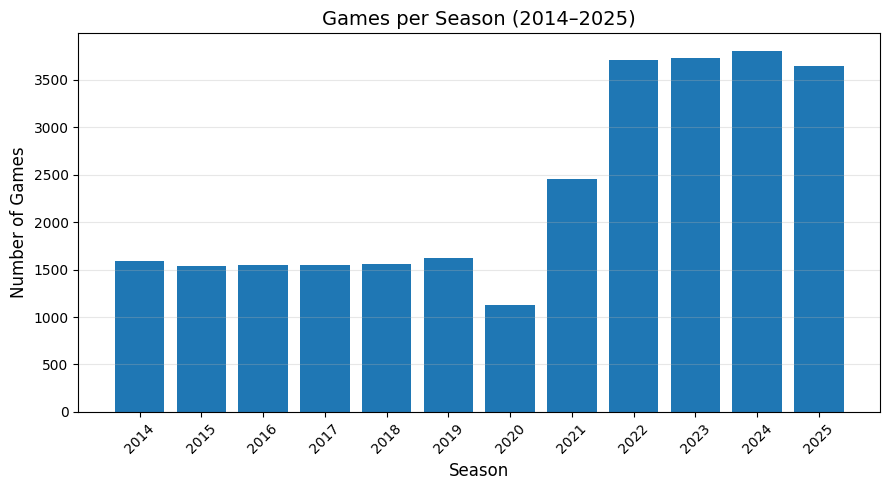

In [8]:
assert season_col is not None, "Couldn't find the season column in df."
counts_by_season = (df.groupby(season_col).size().rename("n_games").reset_index())

plt.figure(figsize=(9,5))
plt.bar(counts_by_season[season_col].astype(str), counts_by_season["n_games"])
plt.title("Games per Season (2014–2025)", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Games", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

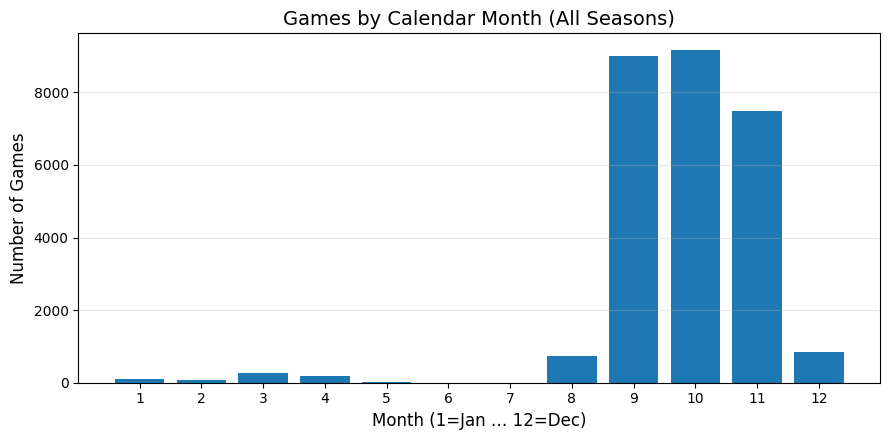

In [9]:
assert startdate_col is not None, "Couldn't find a start-date column in df."
dt = pd.to_datetime(df[startdate_col], errors="coerce", utc=True)
months = dt.dt.month
counts_by_month = months.value_counts(dropna=False).sort_index()
idx = pd.Index(range(1,13), name="month")
counts_by_month = counts_by_month.reindex(idx).fillna(0).astype(int)

plt.figure(figsize=(9,4.5))
plt.bar([str(m) for m in counts_by_month.index], counts_by_month.values)
plt.title("Games by Calendar Month (All Seasons)", fontsize=14)
plt.xlabel("Month (1=Jan … 12=Dec)", fontsize=12)
plt.ylabel("Number of Games", fontsize=12)
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

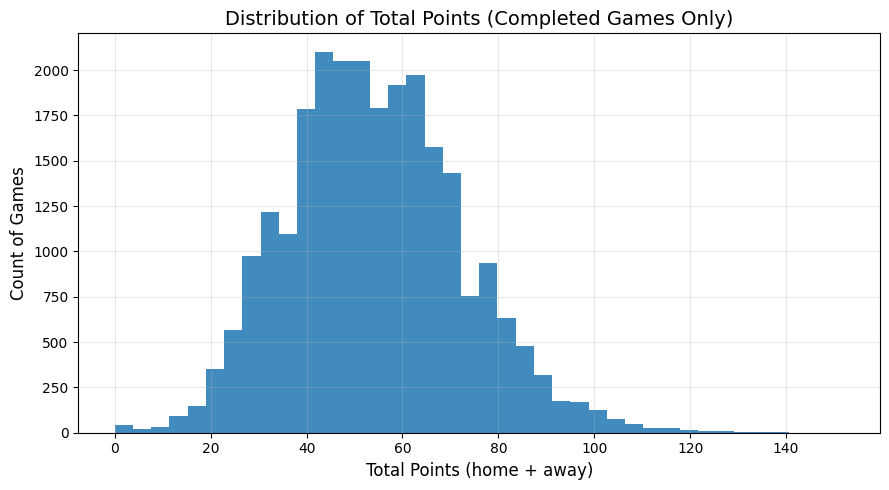

n(completed with scores) = 25,017
Median total points = 53.0


In [10]:
assert (home_pts_col is not None) and (away_pts_col is not None), "Couldn't find home/away points columns in df."

totals = df.loc[completed_mask, "total_points__tmp"].dropna()

plt.figure(figsize=(9,5))
plt.hist(totals, bins=40, alpha=0.85)
plt.title("Distribution of Total Points (Completed Games Only)", fontsize=14)
plt.xlabel("Total Points (home + away)", fontsize=12)
plt.ylabel("Count of Games", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"n(completed with scores) = {len(totals):,}")
print(f"Median total points = {totals.median():.1f}")

## Further EDA

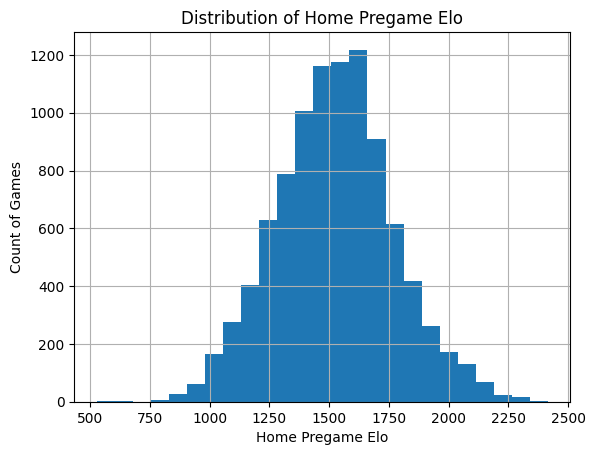

In [11]:
df["homePregameElo"].hist(bins=25)
plt.title("Distribution of Home Pregame Elo")
plt.xlabel("Home Pregame Elo")
plt.ylabel("Count of Games")
plt.show()

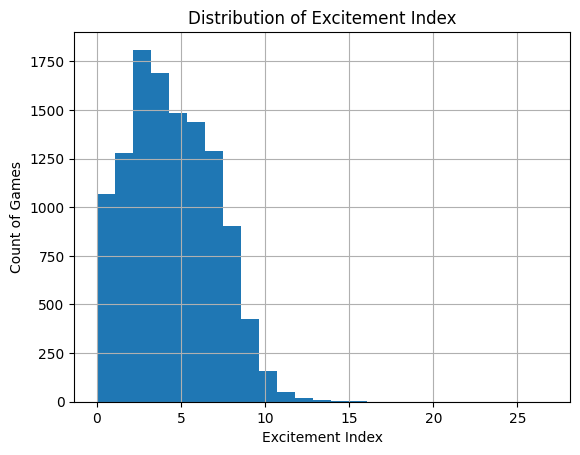

In [12]:
df["excitementIndex"].hist(bins=25)
plt.title("Distribution of Excitement Index")
plt.xlabel("Excitement Index")
plt.ylabel("Count of Games")
plt.show()

In [13]:
#Creating columns for whether home or away won
df["homeWon"] = (df["homePoints"] > df["awayPoints"]).astype(int)
df["awayWon"] = (df["awayPoints"] > df["homePoints"]).astype(int)

<function matplotlib.pyplot.show(close=None, block=None)>

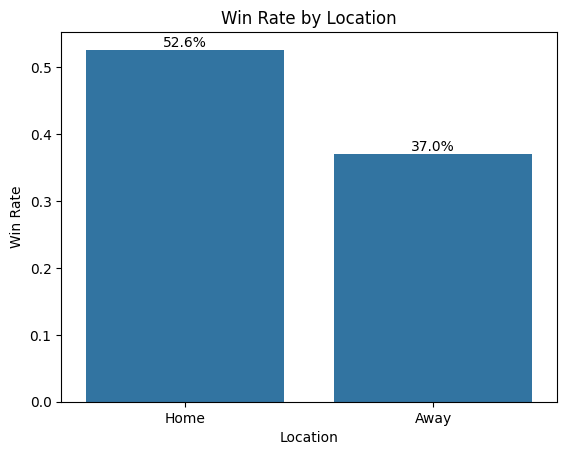

In [14]:
winRates = pd.DataFrame({"Location": ["Home", "Away"], "Win Rate":[df["homeWon"].mean(), df["awayWon"].mean()]})
sns.barplot(data = winRates, x = "Location", y = "Win Rate")
plt.title("Win Rate by Location")
plt.xlabel("Location")
plt.ylabel("Win Rate")
winRateHome = df["homeWon"].mean()
winRateAway = df["awayWon"].mean()
plt.text(0, winRateHome, f"{winRateHome*100:.1f}%", ha='center', va='bottom')
plt.text(1, winRateAway, f"{winRateAway*100:.1f}%", ha='center', va='bottom')
plt.savefig("WinRatesbyLocation.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

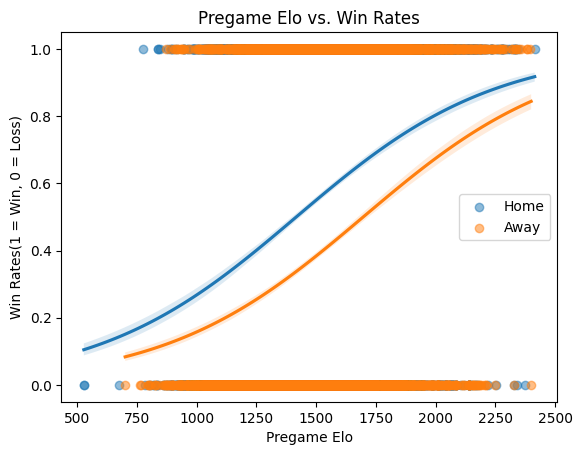

In [15]:
sns.regplot(
    data = df,
    x="homePregameElo",
    y="homeWon",
    logistic = True,
    scatter_kws={"alpha": 0.5},
    label = "Home"
)
sns.regplot(
    data = df,
    x="awayPregameElo",
    y="awayWon",
    logistic = True,
    scatter_kws={"alpha": 0.5},
    label = "Away"
)
plt.title("Pregame Elo vs. Win Rates")
plt.xlabel("Pregame Elo")
plt.ylabel("Win Rates(1 = Win, 0 = Loss)")
plt.legend()
plt.savefig("PregameEloVsWinRates.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

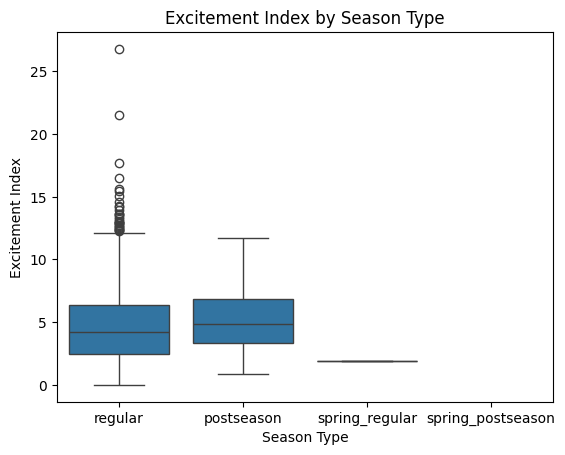

In [16]:
sns.boxplot(
    data = df,
    x = "seasonType",
    y = "excitementIndex",
)
plt.title("Excitement Index by Season Type")
plt.xlabel("Season Type")
plt.ylabel("Excitement Index")
plt.show

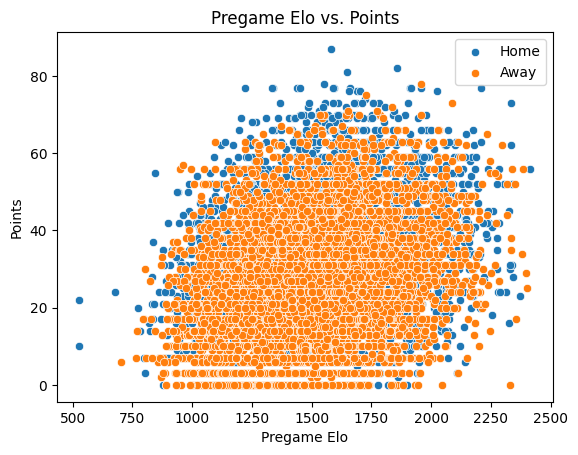

In [17]:
sns.scatterplot(
    data = df,
    x = "homePregameElo",
    y = "homePoints",
    label = "Home"
)
sns.scatterplot(
    data = df,
    x = "awayPregameElo",
    y = "awayPoints",
    label = "Away"
)
plt.title("Pregame Elo vs. Points")
plt.xlabel("Pregame Elo")
plt.ylabel("Points")
plt.legend()

In [18]:
df["eloDifference"] = df["homePregameElo"] - df["awayPregameElo"]

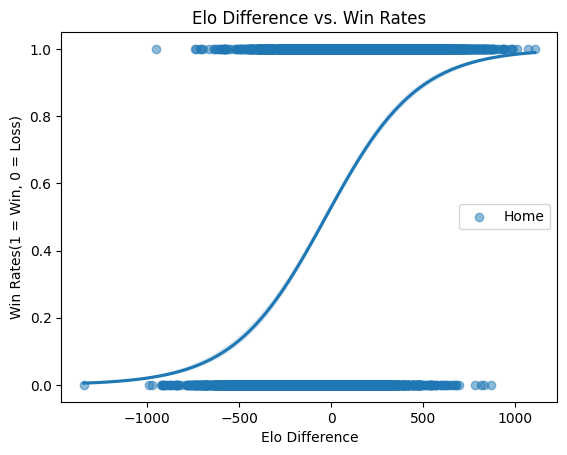

In [19]:
sns.regplot(
    data = df,
    x = "eloDifference",
    y = "homeWon",
    logistic = True,
    scatter_kws={"alpha": 0.5},
    label = "Home"
)
plt.title("Elo Difference vs. Win Rates")
plt.xlabel("Elo Difference")
plt.ylabel("Win Rates(1 = Win, 0 = Loss)")
plt.legend()
plt.savefig("EloDifferenceVsWinRates.png")
plt.show()

In [20]:
fig, ax = plt.subplots(figsize=(7,5))
df["excitementIndex"].dropna().hist(bins=30, ax=ax)
ax.set_title("Distribution of Game Excitement")
ax.set_xlabel("Excitement Index")
ax.set_ylabel("Number of Games")
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("excitement_hist.png", dpi=150)
plt.close()

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
df.boxplot(column="excitementIndex", by="season", ax=ax, grid=False, rot=0)
ax.set_title("Excitement Index by Season")
ax.set_xlabel("Season")
ax.set_ylabel("Excitement Index")
plt.suptitle("")
plt.tight_layout()
plt.savefig("excitement_by_season.png", dpi=150)
plt.close()

# Sports Reference


## Data Import (Ratings)

In [22]:
from google.colab import drive
drive.mount('/content/drive')

def clean_ratings(path, season):
  df = pd.read_csv(path, header=[0, 1])

  ## flatten 2 rows title into 1 row
  lvl0 = pd.Series([None if isinstance(a, str) and a.startswith("Unnamed") else a
                  for a, _ in df.columns]).ffill()

  lvl1 = [None if (b is None or (isinstance(b, str) and b.startswith("Unnamed")))
        else b for _, b in df.columns]

  df.columns = [
    (a if (b is None or b == "" or b == "None") else f"{a}_{b}" if not (a is None or a == "") else b).replace(" ", "_")
    for a, b in zip(lvl0, lvl1)
  ]
  # Derived metrics
  df["WinPct"] = df["Overall_W"] / (df["Overall_W"] + df["Overall_L"])
  df["MOV"]    = df["Scoring_Off"] - df["Scoring_Def"]

  df["Season"] = int(season)

  return df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
files = [
    "/content/drive/My Drive/DAT 490/srcfb/ratings_2014.csv",
    "/content/drive/My Drive/DAT 490/srcfb/ratings_2015.csv",
    "/content/drive/My Drive/DAT 490/srcfb/ratings_2016.csv",
    "/content/drive/My Drive/DAT 490/srcfb/ratings_2017.csv",
    "/content/drive/My Drive/DAT 490/srcfb/ratings_2018.csv",
    "/content/drive/My Drive/DAT 490/srcfb/ratings_2019.csv",
    "/content/drive/My Drive/DAT 490/srcfb/ratings_2020.csv",
    "/content/drive/My Drive/DAT 490/srcfb/ratings_2021.csv",
    "/content/drive/My Drive/DAT 490/srcfb/ratings_2022.csv",
    "/content/drive/My Drive/DAT 490/srcfb/ratings_2023.csv",
    "/content/drive/My Drive/DAT 490/srcfb/ratings_2024.csv"
]

all_clean = []
for f in files:
    season = int(f.split("_")[-1].split(".")[0])
    all_clean.append(clean_ratings(f, season))

ratings_all = pd.concat(all_clean, ignore_index=True)

In [24]:
ratings_all.head()

,Rk,School,Conf,AP_Rank,Overall_W,Overall_L,SRS_OSRS,SRS_DSRS,SRS_SRS,Scoring_Off,Scoring_Def,Passing_Off,Passing_Def,Rushing_Off,Rushing_Def,Total_Off,Total_Def,WinPct,MOV,Season
0,1,Oregon,Pac-12 (North),2.0,13,2,14.36,7.86,22.22,61.16,5.13,11.41,5.10,6.57,3.39,8.58,4.13,0.866667,56.03,2014
1,2,Ohio State,Big Ten (East),1.0,14,1,13.44,7.00,20.44,62.75,5.78,10.71,4.44,6.98,2.61,8.38,3.52,0.933333,56.97,2014
2,3,Alabama,SEC (West),4.0,12,2,9.46,10.88,20.34,57.12,-0.11,10.71,4.50,6.35,1.96,8.23,3.40,0.857143,57.23,2014
3,4,Texas Christian,Big 12,3.0,12,1,11.20,7.76,18.96,61.91,4.27,9.52,5.31,6.22,1.96,7.88,3.51,0.923077,57.64,2014
4,5,Georgia,SEC (East),9.0,10,3,10.88,7.96,18.84,59.13,3.93,9.85,4.09,7.30,3.12,8.27,3.60,0.769231,55.20,2014


In [25]:
ratings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           1432 non-null   int64  
 1   School       1432 non-null   object 
 2   Conf         1432 non-null   object 
 3   AP_Rank      275 non-null    float64
 4   Overall_W    1432 non-null   int64  
 5   Overall_L    1432 non-null   int64  
 6   SRS_OSRS     1430 non-null   float64
 7   SRS_DSRS     1430 non-null   float64
 8   SRS_SRS      1430 non-null   float64
 9   Scoring_Off  1430 non-null   float64
 10  Scoring_Def  1430 non-null   float64
 11  Passing_Off  1430 non-null   float64
 12  Passing_Def  1430 non-null   float64
 13  Rushing_Off  1430 non-null   float64
 14  Rushing_Def  1430 non-null   float64
 15  Total_Off    1430 non-null   float64
 16  Total_Def    1430 non-null   float64
 17  WinPct       1430 non-null   float64
 18  MOV          1430 non-null   float64
 19  Season

## Ratings EDA


In [26]:
# AP Rank vs WinPct
def plot_aprank_vs_winpct_with_trend(df, season, top_n_outliers=10, savepath=None):
    sub = df[(df["Season"]==season)].dropna(subset=["AP_Rank","WinPct"]).copy()
    sub = sub[(sub["AP_Rank"] > 0) & np.isfinite(sub["WinPct"])]
    if sub.empty:
        return

    x = sub["AP_Rank"].astype(float).values
    y = sub["WinPct"].astype(float).values

    b, a = np.polyfit(x, y, deg=1)
    xs = np.linspace(x.min(), x.max(), 200)
    ys = a + b*xs

    residuals = y - (a + b*x)
    out_idx = np.argsort(np.abs(residuals))[-top_n_outliers:]

    fig, ax = plt.subplots(figsize=(7,5))
    ax.scatter(x, y, alpha=0.7)
    ax.plot(xs, ys, linewidth=2)

    ax.scatter(x[out_idx], y[out_idx], alpha=0.9)
    for i in out_idx:
        ax.text(x[i], y[i], str(sub.iloc[i]["School"]), fontsize=8, ha="right", va="bottom")

    ax.set_xlabel("AP Rank (lower = stronger)")
    ax.set_ylabel("Win %")
    ax.set_title(f"AP Rank vs Win% — {season}")
    ax.invert_xaxis()
    ax.grid(True, alpha=0.25)
    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=150)
        plt.close()
    else:
        plt.show()

In [27]:
plot_aprank_vs_winpct_with_trend(
    ratings_all, 2024,
    savepath="/content/drive/My Drive/DAT 490/aprank_winpct_2024.png"
)

In [28]:
def facet_aprank_vs_winpct_with_outliers(df, team_col="School", top_n_outliers=5, savepath=None):

    sub = df.dropna(subset=["AP_Rank","WinPct","Season"]).copy()
    sub = sub[(sub["AP_Rank"] > 0) & np.isfinite(sub["WinPct"])]

    g = sns.FacetGrid(sub, col="Season", col_wrap=5, height=3.5, sharex=False, sharey=False)

    def scatter_with_outliers(data, color, **kwargs):
        x = data["AP_Rank"].astype(float).values
        y = data["WinPct"].astype(float).values

        plt.scatter(x, y, alpha=0.6, s=25, color=color)

        if len(x) > 1:
            b, a = np.polyfit(x, y, deg=1)
            xs = np.linspace(x.min(), x.max(), 200)
            ys = a + b*xs
            plt.plot(xs, ys, color="red", linewidth=2)

            residuals = y - (a + b*x)
            out_idx = np.argsort(np.abs(residuals))[-top_n_outliers:]

            plt.scatter(x[out_idx], y[out_idx], color="orange", edgecolor="k", s=40, zorder=3)
            for i in out_idx:
                label = f'{data.iloc[i][team_col]}'
                plt.text(x[i], y[i], label, fontsize=7, ha="right", va="bottom")

        plt.gca().invert_xaxis()
        plt.grid(True, alpha=0.25)

    g.map_dataframe(scatter_with_outliers)

    g.set_axis_labels("AP Rank (lower = stronger)", "Win %")
    g.set_titles("Season {col_name}")

    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=150)
        plt.close()
    else:
        plt.show()

facet_aprank_vs_winpct_with_outliers(ratings_all, team_col="School", top_n_outliers=10,
                                      savepath="facet_aprank_winpct_outliers.png")


## Data Import (Standings)

In [29]:
def clean_standings(path, season):
  df = pd.read_csv(path, header=[0, 1])

  ## flatten 2 rows title into 1 row
  lvl0 = pd.Series([None if isinstance(a, str) and a.startswith("Unnamed") else a
                  for a, _ in df.columns]).ffill()

  lvl1 = [None if (b is None or (isinstance(b, str) and b.startswith("Unnamed")))
        else b for _, b in df.columns]

  df.columns = [
    (a if (b is None or b == "" or b == "None") else f"{a}_{b}" if not (a is None or a == "") else b).replace(" ", "_")
    for a, b in zip(lvl0, lvl1)
  ]
  # Derived metrics
  df["ConfStrengthDiff"] = df["Conference_Pct"] - df["Overall_Pct"]
  df["PollRankGap"] = df["Polls_AP_Pre"] - df["Polls_AP_Rank"]

  df["Season"] = int(season)

  return df

In [30]:
files = [
    "/content/drive/My Drive/DAT 490/srcfb/standings_2014.csv",
    "/content/drive/My Drive/DAT 490/srcfb/standings_2015.csv",
    "/content/drive/My Drive/DAT 490/srcfb/standings_2016.csv",
    "/content/drive/My Drive/DAT 490/srcfb/standings_2017.csv",
    "/content/drive/My Drive/DAT 490/srcfb/standings_2018.csv",
    "/content/drive/My Drive/DAT 490/srcfb/standings_2019.csv",
    "/content/drive/My Drive/DAT 490/srcfb/standings_2020.csv",
    "/content/drive/My Drive/DAT 490/srcfb/standings_2021.csv",
    "/content/drive/My Drive/DAT 490/srcfb/standings_2022.csv",
    "/content/drive/My Drive/DAT 490/srcfb/standings_2023.csv",
    "/content/drive/My Drive/DAT 490/srcfb/standings_2024.csv"
]

all_clean = []
for f in files:
    season = int(f.split("_")[-1].split(".")[0])
    all_clean.append(clean_standings(f, season))

standings_all = pd.concat(all_clean, ignore_index=True)

In [31]:
standings_all.head()

,Rk,School,Conf,Overall_W,Overall_L,Overall_Pct,Conference_W,Conference_L,Conference_Pct,Points_Per_Game_Off,Points_Per_Game_Def,SRS_SRS,SRS_SOS,Polls_AP_Pre,Polls_AP_High,Polls_AP_Rank,Polls_Notes,ConfStrengthDiff,PollRankGap,Season
0,1,Florida State,ACC (Atlantic),13,1,0.929,8.0,0.0,1.000,33.7,25.6,14.48,5.13,1.0,1.0,5.0,NaN,0.071,-4.0,2014
1,2,Clemson,ACC (Atlantic),10,3,0.769,6.0,2.0,0.750,30.8,16.7,11.63,2.86,16.0,15.0,15.0,NaN,-0.019,1.0,2014
2,3,Louisville,ACC (Atlantic),9,4,0.692,5.0,3.0,0.625,31.2,21.8,10.52,3.22,NaN,20.0,24.0,NaN,-0.067,NaN,2014
3,4,Boston College,ACC (Atlantic),7,6,0.538,4.0,4.0,0.500,26.2,21.3,6.04,2.35,NaN,NaN,NaN,NaN,-0.038,NaN,2014
4,5,North Carolina State,ACC (Atlantic),8,5,0.615,3.0,5.0,0.375,30.2,27.0,4.17,1.25,NaN,NaN,NaN,NaN,-0.240,NaN,2014


In [32]:
standings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rk                   1432 non-null   int64  
 1   School               1432 non-null   object 
 2   Conf                 1432 non-null   object 
 3   Overall_W            1432 non-null   int64  
 4   Overall_L            1432 non-null   int64  
 5   Overall_Pct          1430 non-null   float64
 6   Conference_W         1378 non-null   float64
 7   Conference_L         1378 non-null   float64
 8   Conference_Pct       1373 non-null   float64
 9   Points_Per_Game_Off  1430 non-null   float64
 10  Points_Per_Game_Def  1430 non-null   float64
 11  SRS_SRS              1430 non-null   float64
 12  SRS_SOS              1430 non-null   float64
 13  Polls_AP_Pre         275 non-null    float64
 14  Polls_AP_High        520 non-null    float64
 15  Polls_AP_Rank        275 non-null    f

## Standings EDA

In [33]:
def plot_poll_gap_vs_winpct(df, season, top_n=8, savepath=None):
    data = df if season is None else df[df["Season"]==season]
    sub = data.dropna(subset=["PollRankGap","Overall_Pct"]).copy()
    if sub.empty: return

    x, y = sub["PollRankGap"].values, sub["Overall_Pct"].values
    b, a = np.polyfit(x, y, deg=1)
    y_pred = a + b*x
    residuals = y - y_pred

    out_idx = np.argsort(np.abs(residuals))[-top_n:]

    fig, ax = plt.subplots(figsize=(7,5))
    ax.scatter(x, y, alpha=0.6, label="Teams")
    ax.plot(np.linspace(x.min(), x.max(), 200),
            a + b*np.linspace(x.min(), x.max(), 200),
            color="blue", linewidth=2, label="Trend")

    for i in out_idx:
        color = "orange" if residuals[i] < 0 else "green"
        ax.scatter(x[i], y[i], color=color, s=80, edgecolor="k")
        ax.text(x[i], y[i], sub.iloc[i]["School"],
                fontsize=8, ha="right", va="bottom")

    title_season = f" — {season}" if season else " — All Seasons"
    ax.set_title(f"PollRankGap vs Win% {title_season}")
    ax.set_xlabel("PollRankGap (AP_Pre − AP_Rank)")
    ax.set_ylabel("Win %")
    ax.grid(True, alpha=0.25)
    plt.tight_layout()
    if savepath: plt.savefig(savepath, dpi=150); plt.close()
    else: plt.show()


In [34]:
plot_poll_gap_vs_winpct(
    standings_all, 2024,
    savepath="/content/drive/My Drive/DAT 490/pollgap_winpct_2024.png"
)

                            OLS Regression Results                            
Dep. Variable:            PollRankGap   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     22.84
Date:                Sun, 05 Oct 2025   Prob (F-statistic):           4.06e-06
Time:                        02:08:14   Log-Likelihood:                -509.40
No. Observations:                 157   AIC:                             1023.
Df Residuals:                     155   BIC:                             1029.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -21.5893      4.561     -4.733      

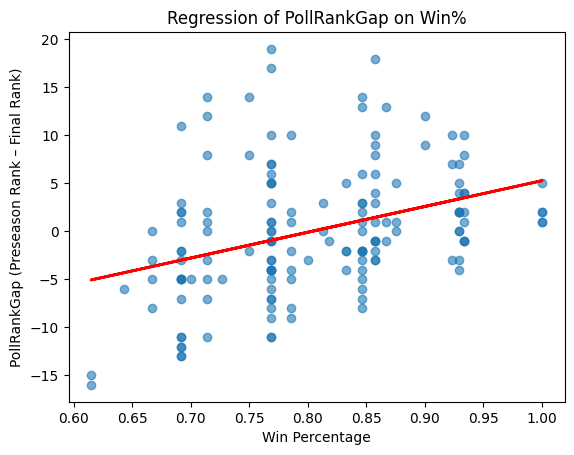

In [35]:
import statsmodels.api as sm
sub = standings_all.dropna(subset=["PollRankGap", "Overall_Pct"])

X = sm.add_constant(sub["Overall_Pct"])
y = sub["PollRankGap"]
model = sm.OLS(y, X).fit()

print(model.summary())

plt.scatter(sub["Overall_Pct"], sub["PollRankGap"], alpha=0.6)
plt.plot(sub["Overall_Pct"], model.predict(X), color="red", linewidth=2)
plt.xlabel("Win Percentage")
plt.ylabel("PollRankGap (Preseason Rank – Final Rank)")
plt.title("Regression of PollRankGap on Win%")
plt.show()

# Data Merging


In [36]:
def build_team_season_from_games(games_df):

    home_df = games_df[[
        "season", "homeTeam", "homePoints", "awayPoints",
        "homePregameElo", "homePostgameElo", "homeWon", "excitementIndex"
    ]].copy()
    home_df.rename(columns={
        "homeTeam": "Team",
        "homePoints": "Points_For",
        "awayPoints": "Points_Against",
        "homePregameElo": "PregameElo",
        "homePostgameElo": "PostgameElo",
        "homeWon": "Win",
        "excitementIndex": "Excitement"
    }, inplace=True)

    away_df = games_df[[
        "season", "awayTeam", "awayPoints", "homePoints",
        "awayPregameElo", "awayPostgameElo", "awayWon", "excitementIndex"
    ]].copy()
    away_df.rename(columns={
        "awayTeam": "Team",
        "awayPoints": "Points_For",
        "homePoints": "Points_Against",
        "awayPregameElo": "PregameElo",
        "awayPostgameElo": "PostgameElo",
        "awayWon": "Win",
        "excitementIndex": "Excitement"
    }, inplace=True)

    team_games = pd.concat([home_df, away_df], ignore_index=True)

    team_season = team_games.groupby(["season", "Team"]).agg({
        "Points_For": "sum",
        "Points_Against": "sum",
        "Win": "sum",
        "PregameElo": ["mean", "first"],
        "PostgameElo": "last",
        "Excitement": "mean"
    }).reset_index()

    team_season.columns = [
        "Season", "Team", "Points_For", "Points_Against", "Total_Wins",
        "PregameElo_Mean", "PregameElo_Start", "PostgameElo_End", "Excitement"
    ]

    team_season["Elo_Delta"] = team_season["PostgameElo_End"] - team_season["PregameElo_Start"]

    return team_season

In [37]:
team_season_stats = build_team_season_from_games(df)
print(team_season_stats.head())

   Season               Team  Points_For  Points_Against  Total_Wins  \
0    2014  Abilene Christian       371.0           325.0           5   
1    2014          Air Force       409.0           314.0          10   
2    2014              Akron       271.0           277.0           5   
3    2014            Alabama       517.0           258.0          12   
4    2014        Alabama A&M       314.0           392.0           4   

   PregameElo_Mean  PregameElo_Start  PostgameElo_End  Excitement  Elo_Delta  
0              NaN               NaN              NaN    7.363467        NaN  
1      1323.666667            1320.0           1320.0    5.111368        0.0  
2      1243.636364            1269.0           1258.0    4.287397      -11.0  
3      2021.230769            1952.0           1952.0    4.157294        0.0  
4              NaN               NaN              NaN    0.976413        NaN  


In [38]:
# Merge with Sports Reference Ratings
# Ratings_all has "School" column for team name and "Season"
merged_df = pd.merge(
    ratings_all,
    team_season_stats,
    left_on=["School", "Season"],
    right_on=["Team", "Season"],
    how="inner"
)

print(merged_df.head())

   Rk      School            Conf  AP_Rank  Overall_W  Overall_L  SRS_OSRS  \
0   1      Oregon  Pac-12 (North)      2.0         13          2     14.36   
1   2  Ohio State  Big Ten (East)      1.0         14          1     13.44   
2   3     Alabama      SEC (West)      4.0         12          2      9.46   
3   5     Georgia      SEC (East)      9.0         10          3     10.88   
4   6    Ole Miss      SEC (West)     17.0          9          4      0.87   

   SRS_DSRS  SRS_SRS  Scoring_Off  Scoring_Def  Passing_Off  Passing_Def  \
0      7.86    22.22        61.16         5.13        11.41         5.10   
1      7.00    20.44        62.75         5.78        10.71         4.44   
2     10.88    20.34        57.12        -0.11        10.71         4.50   
3      7.96    18.84        59.13         3.93         9.85         4.09   
4     15.93    16.80        47.62        -4.36         9.79         4.17   

   Rushing_Off  Rushing_Def  Total_Off  Total_Def    WinPct    MOV  Season

In [39]:
# Select only the needed standings columns
standings_keep = standings_all[[
    "School", "Season",
    "Polls_AP_Pre", "Polls_AP_High",
    "ConfStrengthDiff", "PollRankGap", "SRS_SOS"
]]

# Merge with merged_df
final_merged = pd.merge(
    merged_df,
    standings_keep,
    on=["School", "Season"],
    how="left"
)

# Rename for consistency with fraud score pipeline
final_merged = final_merged.rename(columns={
    "Polls_AP_Pre": "AP_Pre",
    "Polls_AP_High": "AP_High",
    "SRS_SOS": "SOS"
})

In [40]:
print("Final merged shape:", final_merged.shape)
print(final_merged.head())

Final merged shape: (1299, 34)
   Rk      School            Conf  AP_Rank  Overall_W  Overall_L  SRS_OSRS  \
0   1      Oregon  Pac-12 (North)      2.0         13          2     14.36   
1   2  Ohio State  Big Ten (East)      1.0         14          1     13.44   
2   3     Alabama      SEC (West)      4.0         12          2      9.46   
3   5     Georgia      SEC (East)      9.0         10          3     10.88   
4   6    Ole Miss      SEC (West)     17.0          9          4      0.87   

   SRS_DSRS  SRS_SRS  Scoring_Off  Scoring_Def  Passing_Off  Passing_Def  \
0      7.86    22.22        61.16         5.13        11.41         5.10   
1      7.00    20.44        62.75         5.78        10.71         4.44   
2     10.88    20.34        57.12        -0.11        10.71         4.50   
3      7.96    18.84        59.13         3.93         9.85         4.09   
4     15.93    16.80        47.62        -4.36         9.79         4.17   

   Rushing_Off  Rushing_Def  Total_Off  Tot

In [41]:
final_merged.head()
print(final_merged.columns)

Index(['Rk', 'School', 'Conf', 'AP_Rank', 'Overall_W', 'Overall_L', 'SRS_OSRS',
       'SRS_DSRS', 'SRS_SRS', 'Scoring_Off', 'Scoring_Def', 'Passing_Off',
       'Passing_Def', 'Rushing_Off', 'Rushing_Def', 'Total_Off', 'Total_Def',
       'WinPct', 'MOV', 'Season', 'Team', 'Points_For', 'Points_Against',
       'Total_Wins', 'PregameElo_Mean', 'PregameElo_Start', 'PostgameElo_End',
       'Excitement', 'Elo_Delta', 'AP_Pre', 'AP_High', 'ConfStrengthDiff',
       'PollRankGap', 'SOS'],
      dtype='object')


# Creating average ELO of oppoenents Metric

In [42]:
def add_strength_of_schedule_to_merged(games_df, merged_df):

    home_opps = games_df[["season", "homeTeam", "awayPregameElo"]].copy()
    home_opps.rename(columns={
        "homeTeam": "Team",
        "awayPregameElo": "OpponentElo"
    }, inplace=True)

    away_opps = games_df[["season", "awayTeam", "homePregameElo"]].copy()
    away_opps.rename(columns={
        "awayTeam": "Team",
        "homePregameElo": "OpponentElo"
    }, inplace=True)


    opps = pd.concat([home_opps, away_opps], ignore_index=True)

    sos = opps.groupby(["season", "Team"])["OpponentElo"].mean().reset_index()
    sos.rename(columns={"OpponentElo": "Opp_Avg_Elo"}, inplace=True)

    # Merge SOS into the merged dataset
    merged_with_sos = pd.merge(
        merged_df,
        sos,
        left_on=["Season", "School"],   # Sports Reference naming
        right_on=["season", "Team"],    # CFBD naming
        how="left"
    )

    # Only drop those columns if they exist
    merged_with_sos = merged_with_sos.drop(
        columns=[c for c in ["season", "Team"] if c in merged_with_sos.columns]
    )

    return merged_with_sos

# Apply SOS calculation to merged dataset
merged_with_sos = add_strength_of_schedule_to_merged(df, merged_df)
print(merged_with_sos[["School", "Season", "Total_Wins", "Opp_Avg_Elo"]].head())


       School  Season  Total_Wins  Opp_Avg_Elo
0      Oregon    2014          13  1670.000000
1  Ohio State    2014          14  1673.933333
2     Alabama    2014          12  1695.384615
3     Georgia    2014          10  1649.250000
4    Ole Miss    2014           9  1746.166667


# Clustering

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def cluster_all_features(df, season, k=3):
    exclude_cols = ["Team", "School", "Conf", "Season"]
    features = [c for c in df.columns if c not in exclude_cols]

    season_df = df[df["Season"] == season].copy()
    X = season_df[features].select_dtypes(include="number").dropna(axis=1, how="any")

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    season_df["Cluster"] = labels

    sil = silhouette_score(X_scaled, labels)
    print(f"Season {season}, k={k}, silhouette={sil:.3f}")

    print("Cluster sizes:\n", season_df["Cluster"].value_counts())
    print("\nCluster means (selected key stats):")
    print(season_df.groupby("Cluster")[["SRS_SRS","WinPct","MOV","SOS"]].mean())

    for c in sorted(season_df["Cluster"].unique()):
        teams = season_df.loc[season_df["Cluster"] == c, "Team"].tolist()
        print(f"\nCluster {c} teams ({len(teams)}):")
        print(", ".join(teams))

    return season_df


In [44]:
def silhouette_elbow(df, season, k_range=range(2, 11), savepath=None):
    exclude_cols = ["Team", "School", "Conf", "Season"]
    features = [c for c in df.columns if c not in exclude_cols]

    season_df = df[df["Season"] == season].copy()
    X = season_df[features].select_dtypes(include="number").dropna(axis=1, how="any")

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
        labels = kmeans.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        scores.append(score)
        print(f"Season {season}, k={k}, silhouette={score:.3f}")

    plt.figure(figsize=(8, 5))
    plt.plot(list(k_range), scores, marker="o")
    plt.title(f"Silhouette Score vs k — Season {season}")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.grid(True, alpha=0.3)
    if savepath:
        plt.savefig(savepath, dpi=150)
        plt.close()
    else:
        plt.show()

silhouette_elbow(final_merged, season=2019, k_range=range(2, 11), savepath="silhouette_2019.png")


Season 2019, k=2, silhouette=0.331
Season 2019, k=3, silhouette=0.251
Season 2019, k=4, silhouette=0.212
Season 2019, k=5, silhouette=0.191
Season 2019, k=6, silhouette=0.193
Season 2019, k=7, silhouette=0.199
Season 2019, k=8, silhouette=0.184
Season 2019, k=9, silhouette=0.194
Season 2019, k=10, silhouette=0.190


In [45]:
def plot_inertia_elbow(df, season, k_range=range(2, 11), savepath=None):
    exclude_cols = ["Team", "School", "Conf", "Season"]
    features = [c for c in df.columns if c not in exclude_cols]

    season_df = df[df["Season"] == season].copy()
    X = season_df[features].select_dtypes(include="number").dropna(axis=1, how="any")

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    inertias = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(8,6))
    plt.plot(list(k_range), inertias, marker='o')
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Inertia (Within-cluster SSE)")
    plt.title(f"Inertia vs k — Season {season}")
    plt.grid(True, alpha=0.3)
    if savepath:
        plt.savefig(savepath, dpi=150)
        plt.close()
    else:
        plt.show()

plot_inertia_elbow(final_merged, season=2019, k_range=range(2,11), savepath="inertia_2019")


In [46]:
# 2019 season cluster
clustered_2019 = cluster_all_features(final_merged, season=2019, k=3)

Season 2019, k=3, silhouette=0.251
Cluster sizes:
 Cluster
0    60
1    30
2    28
Name: count, dtype: int64

Cluster means (selected key stats):
           SRS_SRS    WinPct        MOV       SOS
Cluster                                          
0         1.156167  0.506609  30.685667  0.560833
1       -11.318667  0.311966  12.677667 -3.505667
2        14.930000  0.802957  50.339286  3.051071

Cluster 0 teams (60):
SMU, USC, Iowa State, Oklahoma State, Kansas State, North Carolina, Virginia, Michigan State, Kentucky, Indiana, Tennessee, Mississippi State, Arizona State, Tulane, Washington State, California, Virginia Tech, Wake Forest, Louisville, Missouri, Nebraska, Ole Miss, Oregon State, Florida State, San Diego State, Buffalo, South Carolina, Wyoming, Temple, BYU, Tulsa, Western Kentucky, Duke, Colorado, Georgia Southern, Illinois, Boston College, Houston, Purdue, Marshall, UCLA, Texas Tech, Louisiana Tech, Western Michigan, Arkansas State, Utah State, Stanford, Ohio, Syracuse, West

In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def cluster_and_pca(df, season, k=3, savepath=None):
    exclude_cols = ["Team", "School", "Conf", "Season"]
    features = [c for c in df.columns if c not in exclude_cols]

    season_df = df[df["Season"] == season].copy()
    X = season_df[features].select_dtypes(include="number").dropna(axis=1, how="any")

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    season_df["Cluster"] = labels

    sil = silhouette_score(X_scaled, labels)
    print(f"Season {season}, k={k}, silhouette={sil:.3f}")

    pca = PCA(n_components=2)
    pcs = pca.fit_transform(X_scaled)
    season_df["PCA1"] = pcs[:, 0]
    season_df["PCA2"] = pcs[:, 1]

    plt.figure(figsize=(10, 7))
    for c in range(k):
        subset = season_df[season_df["Cluster"] == c]
        plt.scatter(subset["PCA1"], subset["PCA2"], label=f"Cluster {c}", alpha=0.7)

        for _, row in subset.iterrows():
            plt.text(row["PCA1"], row["PCA2"], row["Team"], fontsize=7, alpha=0.7)

    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.title(f"PCA Visualization of {season} Clusters")
    plt.legend()
    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=150)
        plt.close()
    else:
        plt.show()

    return season_df


In [48]:
pca_visual_2019 = cluster_and_pca(final_merged, season=2019, k=3, savepath="pca_clustering_2019.png")

Season 2019, k=3, silhouette=0.251


# Creating Statistical Thresholds for Key Attributes

In [49]:

for col in ["AP_Pre", "AP_Rank", "AP_High"]:
    if col in final_merged.columns:
        final_merged[col] = final_merged[col].fillna(-1)

print("AP cleaning done. Example AP values:")
print(final_merged[["Season","Team","AP_Pre","AP_Rank","AP_High"]].head(10))

pure_play_features = [
    "SRS_OSRS","SRS_DSRS","SRS_SRS",
    "Scoring_Off","Scoring_Def",
    "Passing_Off","Passing_Def",
    "Rushing_Off","Rushing_Def",
    "Total_Off","Total_Def",
    "WinPct","MOV","Points_For","Points_Against",
    "Total_Wins","PostgameElo_End","Elo_Delta","SOS"
]

print("\nPure-play features (cleaned):")
print(pure_play_features)


lower_is_better = {
    "Scoring_Def", "Passing_Def","Rushing_Def","Total_Def","Points_Against"
}

def higher_is_better(col):
    return col not in lower_is_better

print("\nDirection check:")
for f in pure_play_features:
    print(f"{f:20s} -> {'higher' if higher_is_better(f) else 'lower'} is better")


import numpy as np
rows = []

for season, group in final_merged.groupby("Season"):
    for feat in pure_play_features:
        if feat not in group.columns:
            continue
        vals = group[feat].dropna()
        if vals.empty:
            continue

        if higher_is_better(feat):
            top = group.sort_values(feat, ascending=False).head(10)
        else:
            top = group.sort_values(feat, ascending=True).head(10)

        teams = top["Team"].astype(str).tolist()
        arr = top[feat].values

        rows.append({
            "Season": int(season),
            "Feature": feat,
            "Direction": "higher" if higher_is_better(feat) else "lower",
            "Top10_mean": float(np.mean(arr)),
            "Top10_std": float(np.std(arr, ddof=1)) if len(arr)>1 else 0.0,
            "Top10_min": float(np.min(arr)),
            "Top10_max": float(np.max(arr)),
            "Top10_count": len(arr),
            "Top10_teams": "; ".join(teams)
        })

top10_summary = pd.DataFrame(rows)

agg_summary = top10_summary.groupby("Feature").agg({
    "Top10_mean":["mean","std"],
    "Top10_min":"mean",
    "Top10_max":"mean"
})
agg_summary.columns = ["Top10_mean_mean","Top10_mean_std","Top10_min_mean","Top10_max_mean"]
agg_summary = agg_summary.reset_index().sort_values("Top10_mean_mean", ascending=False)

print("\nAggregated summary across seasons (threshold reference):")
display(agg_summary.round(3))

def show_top10_for(season, feature, topn=10):
    df_s = final_merged[final_merged["Season"]==season].copy()
    if feature not in df_s.columns:
        print("Feature not found:", feature)
        return
    if higher_is_better(feature):
        top = df_s.sort_values(feature, ascending=False).head(topn)
    else:
        top = df_s.sort_values(feature, ascending=True).head(topn)
    display(top[["Team",feature,"AP_Pre","AP_Rank"]])

print("\nExample: 2019 top 10 SOS")
show_top10_for(2019,"SOS")


AP cleaning done. Example AP values:
   Season               Team  AP_Pre  AP_Rank  AP_High
0    2014             Oregon     3.0      2.0      2.0
1    2014         Ohio State     5.0      1.0      1.0
2    2014            Alabama     2.0      4.0      1.0
3    2014            Georgia    12.0      9.0      6.0
4    2014           Ole Miss    18.0     17.0      3.0
5    2014     Michigan State     8.0      5.0      5.0
6    2014       Georgia Tech    -1.0      8.0      8.0
7    2014  Mississippi State    -1.0     11.0      1.0
8    2014             Auburn     6.0     22.0      2.0
9    2014             Baylor    10.0      7.0      4.0

Pure-play features (cleaned):
['SRS_OSRS', 'SRS_DSRS', 'SRS_SRS', 'Scoring_Off', 'Scoring_Def', 'Passing_Off', 'Passing_Def', 'Rushing_Off', 'Rushing_Def', 'Total_Off', 'Total_Def', 'WinPct', 'MOV', 'Points_For', 'Points_Against', 'Total_Wins', 'PostgameElo_End', 'Elo_Delta', 'SOS']

Direction check:
SRS_OSRS             -> higher is better
SRS_DSRS      

,Feature,Top10_mean_mean,Top10_mean_std,Top10_min_mean,Top10_max_mean
6,PostgameElo_End,1964.500,32.085,1858.000,2165.727
5,Points_For,563.227,34.453,509.182,640.636
4,Points_Against,201.073,36.995,161.273,230.818
0,Elo_Delta,141.636,23.350,96.818,236.091
14,Scoring_Off,57.977,1.726,54.517,63.857
1,MOV,54.803,4.538,49.472,63.301
12,SRS_SRS,18.566,0.997,15.055,25.326
11,SRS_OSRS,12.099,1.248,9.652,16.512
17,Total_Wins,12.055,0.662,10.909,14.182
10,SRS_DSRS,11.981,0.926,9.774,16.055



Example: 2019 top 10 SOS


,Team,SOS,AP_Pre,AP_Rank
595,Michigan,7.88,7.0,18.0
588,Wisconsin,7.73,19.0,11.0
593,Auburn,7.72,16.0,14.0
638,South Carolina,7.34,-1.0,-1.0
584,Ohio State,7.32,5.0,3.0
585,LSU,6.60,6.0,1.0
623,Mississippi State,5.95,-1.0,-1.0
602,Texas,5.80,10.0,25.0
658,Stanford,5.70,25.0,-1.0
611,USC,5.64,-1.0,-1.0


In [50]:
import pandas as pd
import numpy as np

# Fixed Elite Thresholds
elite_thresholds = {
    "SRS_SRS": (18, "ge"),
    "MOV": (50, "ge"),
    "WinPct": (0.85, "ge"),
    "Total_Wins": (11, "ge"),
    "PostgameElo_End": (1950, "ge"),
    "Elo_Delta": (120, "ge"),
    "SOS": (7.0, "ge"),

    # Offense
    "SRS_OSRS": (12, "ge"),
    "Scoring_Off": (55, "ge"),
    "Points_For": (520, "ge"),
    "Passing_Off": (11.0, "ge"),
    "Rushing_Off": (6.9, "ge"),
    "Total_Off": (8.3, "ge"),

    # Defense
    "SRS_DSRS": (12, "ge"),
    "Scoring_Def": (1.0, "le"),
    "Points_Against": (230, "le"),
    "Passing_Def": (4.2, "le"),
    "Rushing_Def": (2.1, "le"),
    "Total_Def": (3.3, "le"),
}

# Aggregated means/std
borderline_ref = {
    "SRS_SRS": (18.6, 1.0),
    "MOV": (54.8, 4.5),
    "WinPct": (0.879, 0.017),
    "Total_Wins": (12.1, 0.66),
    "PostgameElo_End": (1964.5, 32.1),
    "Elo_Delta": (141.6, 23.4),
    "SOS": (7.07, 1.09),
    "SRS_OSRS": (12.1, 1.25),
    "Scoring_Off": (58.0, 1.7),
    "Points_For": (563.2, 34.5),
    "Passing_Off": (11.35, 0.55),
    "Rushing_Off": (7.06, 0.27),
    "Total_Off": (8.51, 0.21),
    "SRS_DSRS": (12.0, 0.93),
    "Scoring_Def": (-0.75, 2.88),
    "Points_Against": (201.1, 37.0),
    "Passing_Def": (4.07, 0.46),
    "Rushing_Def": (1.80, 0.25),
    "Total_Def": (3.11, 0.30),
}

def apply_thresholds(df, season):

    season_df = df[df["Season"] == season].copy()

    elite_flags = []
    borderline_flags = []

    for idx, row in season_df.iterrows():
        elite_metrics = []
        borderline_metrics = []

        for feat, (cutoff, direction) in elite_thresholds.items():
            if pd.isna(row.get(feat, np.nan)):
                continue

            val = row[feat]

            if direction == "ge" and val >= cutoff:
                elite_metrics.append(feat)
            elif direction == "le" and val <= cutoff:
                elite_metrics.append(feat)
            else:
                if feat in borderline_ref:
                    mu, sigma = borderline_ref[feat]
                    if (direction == "ge" and mu - 2*sigma <= val < cutoff) or \
                       (direction == "le" and cutoff < val <= mu + 2*sigma):
                        borderline_metrics.append(feat)

        elite_flags.append(elite_metrics)
        borderline_flags.append(borderline_metrics)

    season_df["Elite_Metrics"] = elite_flags
    season_df["Borderline_Metrics"] = borderline_flags
    season_df["Elite_Count"] = season_df["Elite_Metrics"].apply(len)
    season_df["Borderline_Count"] = season_df["Borderline_Metrics"].apply(len)

    return season_df


In [51]:
# Test for 2014 and 2019
for yr in [2014, 2019]:
    flagged = apply_thresholds(final_merged, yr)

    print(f"\n==== {yr} Elite/Borderline Results ====")
    display_cols = ["Team", "Elite_Count", "Borderline_Count", "Elite_Metrics", "Borderline_Metrics"]
    print(flagged.sort_values("Elite_Count", ascending=False)[display_cols].head(10))



==== 2014 Elite/Borderline Results ====
              Team  Elite_Count  Borderline_Count  \
1       Ohio State           10                 4   
0           Oregon            9                 2   
2          Alabama            9                 7   
3          Georgia            7                 6   
4         Ole Miss            7                 2   
9           Baylor            6                 2   
21         Clemson            6                 0   
6     Georgia Tech            5                 3   
18        Stanford            5                 1   
5   Michigan State            5                 2   

                                        Elite_Metrics  \
1   [SRS_SRS, MOV, WinPct, Total_Wins, PostgameElo...   
0   [SRS_SRS, MOV, WinPct, Total_Wins, SRS_OSRS, S...   
2   [SRS_SRS, MOV, WinPct, Total_Wins, PostgameElo...   
3   [SRS_SRS, MOV, PostgameElo_End, Scoring_Off, P...   
4   [MOV, SOS, SRS_DSRS, Scoring_Def, Points_Again...   
9   [MOV, Total_Wins, PostgameElo

In [52]:
import pandas as pd
import numpy as np

def add_threshold_features(df, elite_thresholds, borderline_ref=None):

    df_out = df.copy()

    if borderline_ref is None:
        if 'Borderline_thresholds' in globals():
            borderline_ref = globals()['Borderline_thresholds']
        elif 'borderline_ref' in globals():
            borderline_ref = globals()['borderline_ref']
        else:
            borderline_ref = {}

    elite_cols = []
    borderline_cols = []

    for feat, rule in elite_thresholds.items():
        if not isinstance(rule, (list, tuple)) or len(rule) != 2:
            raise ValueError(f"elite_thresholds['{feat}'] must be (cutoff, 'ge'/'le'). Got: {rule}")

        cutoff, direction = rule
        direction = str(direction).lower()
        if feat not in df_out.columns:
            df_out[f"Elite_{feat}"] = 0
            df_out[f"Borderline_{feat}"] = 0
            elite_cols.append(f"Elite_{feat}")
            borderline_cols.append(f"Borderline_{feat}")
            continue

        col = df_out[feat]

        if direction == "ge":
            elite_mask = col >= cutoff
            if feat in borderline_ref:
                mu, sigma = borderline_ref[feat]
                lower = mu - 2 * sigma
                borderline_mask = (col >= lower) & (col < cutoff)
            else:
                borderline_mask = pd.Series(False, index=df_out.index)

        elif direction == "le":
            elite_mask = col <= cutoff
            if feat in borderline_ref:
                mu, sigma = borderline_ref[feat]
                upper = mu + 2 * sigma
                borderline_mask = (col <= upper) & (col > cutoff)
            else:
                borderline_mask = pd.Series(False, index=df_out.index)
        else:
            raise ValueError(f"Direction must be 'ge' or 'le' for feature {feat}. Got: {direction}")

        elite_flag = elite_mask.fillna(False).astype(int)
        borderline_flag = borderline_mask.fillna(False).astype(int)

        df_out[f"Elite_{feat}"] = elite_flag
        df_out[f"Borderline_{feat}"] = borderline_flag

        elite_cols.append(f"Elite_{feat}")
        borderline_cols.append(f"Borderline_{feat}")

    if elite_cols:
        df_out["EliteHits"] = df_out[elite_cols].sum(axis=1)
    else:
        df_out["EliteHits"] = 0

    if borderline_cols:
        df_out["BorderlineHits"] = df_out[borderline_cols].sum(axis=1)
    else:
        df_out["BorderlineHits"] = 0

    df_out["TotalThresholdHits"] = df_out["EliteHits"] + df_out["BorderlineHits"]

    return df_out

In [53]:
# Apply thresholds
final_with_thresholds = add_threshold_features(final_merged, elite_thresholds, borderline_ref=None)

# Check seasons 2014, 2019, 2022, 2024
for yr in [2014, 2019, 2022, 2024]:
    s = final_with_thresholds[final_with_thresholds["Season"] == yr].copy()
    print(f"\nTop teams by EliteHits in {yr}:")
    display(
        s.sort_values("EliteHits", ascending=False)[
            ["Team", "EliteHits", "BorderlineHits", "TotalThresholdHits",
             "AP_Rank","AP_Pre", "AP_High", "SRS_SRS", "WinPct", "SOS"]
        ].head(15)
    )

    print(f"\nFraud Candidates in {yr} (<6 EliteHits & Top 12 AP at some point):")
    frauds = s[(s["EliteHits"] < 6) &
               (((s["AP_Pre"] > 0) & (s["AP_Pre"] <= 12)) |
                ((s["AP_High"] > 0) & (s["AP_High"] <= 12)))]
    display(
        frauds.sort_values("AP_Pre")[
            ["Team", "AP_Rank", "AP_Pre", "AP_High", "EliteHits", "BorderlineHits",
             "TotalThresholdHits", "SRS_SRS", "WinPct", "SOS"]
        ]
    )


Top teams by EliteHits in 2014:


,Team,EliteHits,BorderlineHits,TotalThresholdHits,AP_Rank,AP_Pre,AP_High,SRS_SRS,WinPct,SOS
1,Ohio State,10,4,14,1.0,5.0,1.0,20.44,0.933333,5.17
0,Oregon,9,2,11,2.0,3.0,2.0,22.22,0.866667,6.02
2,Alabama,9,7,16,4.0,2.0,1.0,20.34,0.857143,7.27
3,Georgia,7,6,13,9.0,12.0,6.0,18.84,0.769231,5.07
4,Ole Miss,7,2,9,17.0,18.0,3.0,16.80,0.692308,8.11
9,Baylor,6,2,8,7.0,10.0,4.0,14.97,0.846154,0.59
21,Clemson,6,0,6,15.0,16.0,15.0,11.63,0.769231,2.86
6,Georgia Tech,5,3,8,8.0,-1.0,8.0,15.92,0.785714,4.78
18,Stanford,5,1,6,-1.0,11.0,11.0,12.42,0.615385,4.65
5,Michigan State,5,2,7,5.0,8.0,5.0,16.07,0.846154,1.68



Fraud Candidates in 2014 (<6 EliteHits & Top 12 AP at some point):


,Team,AP_Rank,AP_Pre,AP_High,EliteHits,BorderlineHits,TotalThresholdHits,SRS_SRS,WinPct,SOS
6,Georgia Tech,8.0,-1.0,8.0,5,3,8,15.92,0.785714,4.78
7,Mississippi State,11.0,-1.0,1.0,2,2,4,15.04,0.769231,4.81
20,Arizona,19.0,-1.0,8.0,0,1,1,11.90,0.714286,6.12
11,Florida State,5.0,1.0,1.0,3,2,5,14.48,0.928571,5.13
26,Oklahoma,-1.0,4.0,4.0,1,1,2,10.21,0.615385,3.90
8,Auburn,22.0,6.0,2.0,4,5,9,14.99,0.615385,9.06
12,UCLA,10.0,7.0,7.0,1,2,3,14.40,0.769231,9.10
5,Michigan State,5.0,8.0,5.0,5,2,7,16.07,0.846154,1.68
36,South Carolina,-1.0,9.0,9.0,0,1,1,6.70,0.538462,4.93
18,Stanford,-1.0,11.0,11.0,5,1,6,12.42,0.615385,4.65



Top teams by EliteHits in 2019:


,Team,EliteHits,BorderlineHits,TotalThresholdHits,AP_Rank,AP_Pre,AP_High,SRS_SRS,WinPct,SOS
584,Ohio State,18,0,18,3.0,5.0,2.0,27.39,0.928571,7.32
587,Clemson,15,1,16,2.0,1.0,1.0,21.04,0.933333,2.70
585,LSU,11,4,15,1.0,6.0,1.0,25.80,1.000000,6.60
586,Alabama,10,6,16,8.0,2.0,1.0,21.11,0.846154,2.81
588,Wisconsin,10,3,13,11.0,19.0,6.0,17.73,0.714286,7.73
589,Georgia,10,3,13,4.0,3.0,3.0,17.64,0.857143,5.21
594,Oklahoma,10,0,10,7.0,4.0,4.0,15.79,0.857143,4.36
597,Utah,8,1,9,16.0,14.0,5.0,14.86,0.785714,2.29
599,Memphis,7,1,8,17.0,-1.0,15.0,13.66,0.857143,2.09
590,Penn State,6,6,12,9.0,15.0,5.0,17.34,0.846154,4.88



Fraud Candidates in 2019 (<6 EliteHits & Top 12 AP at some point):


,Team,AP_Rank,AP_Pre,AP_High,EliteHits,BorderlineHits,TotalThresholdHits,SRS_SRS,WinPct,SOS
603,Baylor,13.0,-1.0,8.0,3,3,6,12.12,0.785714,2.62
604,Minnesota,10.0,-1.0,7.0,2,2,4,11.73,0.846154,2.11
595,Michigan,18.0,7.0,7.0,5,3,8,15.50,0.692308,7.88
591,Notre Dame,12.0,9.0,7.0,5,4,9,17.22,0.846154,3.30
602,Texas,25.0,10.0,9.0,0,5,5,12.18,0.615385,5.80
608,Texas A&M,-1.0,12.0,12.0,0,6,6,10.02,0.615385,5.09



Top teams by EliteHits in 2022:


,Team,EliteHits,BorderlineHits,TotalThresholdHits,AP_Rank,AP_Pre,AP_High,SRS_SRS,WinPct,SOS
937,Georgia,15,3,18,1.0,3.0,1.0,25.48,1.000000,6.28
940,Alabama,11,5,16,5.0,1.0,1.0,19.66,0.846154,4.58
939,Ohio State,10,4,14,4.0,2.0,2.0,19.82,0.846154,5.20
938,Michigan,9,7,16,3.0,8.0,2.0,20.59,0.928571,2.73
941,Tennessee,8,3,11,6.0,-1.0,2.0,17.90,0.846154,4.98
942,Penn State,6,3,9,7.0,-1.0,7.0,17.56,0.846154,4.02
944,Texas,6,1,7,25.0,-1.0,18.0,15.92,0.615385,8.16
951,USC,6,1,7,12.0,14.0,4.0,12.13,0.785714,3.49
964,Iowa,6,0,6,-1.0,-1.0,-1.0,7.91,0.615385,2.29
957,Illinois,4,1,5,-1.0,-1.0,14.0,10.01,0.615385,1.17



Fraud Candidates in 2022 (<6 EliteHits & Top 12 AP at some point):


,Team,AP_Rank,AP_Pre,AP_High,EliteHits,BorderlineHits,TotalThresholdHits,SRS_SRS,WinPct,SOS
943,Kansas State,14.0,-1.0,11.0,3,2,5,16.16,0.714286,7.95
946,Florida State,11.0,-1.0,11.0,1,7,8,14.77,0.769231,3.38
953,Washington,8.0,-1.0,8.0,1,4,5,11.56,0.846154,0.64
949,LSU,16.0,-1.0,6.0,1,4,5,13.29,0.714286,6.14
954,Tulane,9.0,-1.0,9.0,2,5,7,11.53,0.857143,0.39
960,UCLA,21.0,-1.0,9.0,0,3,3,8.88,0.692308,0.73
967,Florida,-1.0,-1.0,12.0,1,2,3,6.92,0.461538,7.00
947,Clemson,13.0,4.0,4.0,1,5,6,13.59,0.785714,3.30
955,Notre Dame,18.0,5.0,5.0,0,2,2,10.80,0.692308,3.80
994,Texas A&M,-1.0,6.0,6.0,1,3,4,3.21,0.416667,3.13



Top teams by EliteHits in 2024:


,Team,EliteHits,BorderlineHits,TotalThresholdHits,AP_Rank,AP_Pre,AP_High,SRS_SRS,WinPct,SOS
1177,Ohio State,16,2,18,1.0,2.0,1.0,25.21,0.875000,8.96
1178,Notre Dame,13,2,15,2.0,7.0,2.0,21.69,0.875000,7.57
1181,Texas,12,3,15,4.0,4.0,1.0,19.30,0.812500,7.37
1184,Indiana,11,1,12,10.0,-1.0,5.0,16.33,0.846154,1.95
1179,Oregon,10,4,14,3.0,3.0,1.0,20.04,0.928571,5.83
1180,Penn State,9,5,14,5.0,8.0,3.0,19.60,0.812500,6.91
1182,Ole Miss,8,4,12,11.0,6.0,5.0,16.57,0.769231,2.03
1183,Georgia,8,1,9,6.0,1.0,1.0,16.37,0.785714,7.37
1185,Alabama,7,3,10,17.0,5.0,1.0,15.33,0.692308,5.33
1195,Tennessee,7,0,7,9.0,15.0,4.0,10.89,0.769231,1.89



Fraud Candidates in 2024 (<6 EliteHits & Top 12 AP at some point):


,Team,AP_Rank,AP_Pre,AP_High,EliteHits,BorderlineHits,TotalThresholdHits,SRS_SRS,WinPct,SOS
1187,SMU,12.0,-1.0,8.0,3,6,9,14.19,0.785714,2.76
1189,BYU,13.0,-1.0,7.0,3,3,6,13.09,0.846154,1.47
1196,Iowa State,15.0,-1.0,9.0,1,2,3,10.80,0.785714,3.01
1192,Arizona State,7.0,-1.0,7.0,2,5,7,11.85,0.785714,3.28
1201,Boise State,8.0,-1.0,8.0,4,0,4,10.50,0.857143,-1.85
1197,Michigan,-1.0,9.0,9.0,5,2,7,10.76,0.615385,9.38
1268,Florida State,-1.0,10.0,10.0,0,1,1,-5.14,0.166667,6.20
1205,Missouri,22.0,11.0,6.0,0,3,3,9.18,0.769231,3.18
1235,Utah,-1.0,12.0,10.0,0,4,4,1.63,0.416667,1.63
1188,LSU,-1.0,13.0,8.0,0,4,4,13.36,0.692308,6.82


# Calculating Fraud Score

In [54]:

labeled_df = final_with_thresholds.copy()

labeled_df["FraudLabel"] = np.nan

# Fraud: Top 12 AP at some point AND <= 6 elite hits
fraud_mask = (labeled_df["AP_High"] <= 12) & (labeled_df["EliteHits"] <= 6) & (labeled_df["AP_High"] > 0)
labeled_df.loc[fraud_mask, "FraudLabel"] = 1

# Contender: Top 12 AP at some point AND > 6 elite hits
contender_mask = (labeled_df["AP_High"] <= 12) & (labeled_df["EliteHits"] > 6) & (labeled_df["AP_High"] > 0)
labeled_df.loc[contender_mask, "FraudLabel"] = 0

# Irrelevant: Never ranked in AP Top 25 (AP_High <= 0 or missing)
irrelevant_mask = (labeled_df["AP_High"] <= 0) | (labeled_df["AP_High"].isna())
labeled_df.loc[irrelevant_mask, "FraudLabel"] = 2

for yr in [2014, 2019, 2022]:
    subset = labeled_df[labeled_df["Season"] == yr]
    print(f"\nFraud Labels in {yr}:")
    print(
        subset[["Team", "AP_Rank", "AP_High", "EliteHits", "FraudLabel"]]
        .sort_values("FraudLabel", ascending=False)
        .head(15)
    )


Fraud Labels in 2014:
                Team  AP_Rank  AP_High  EliteHits  FraudLabel
42          Virginia     -1.0     -1.0          0         2.0
41    Louisiana Tech     -1.0     -1.0          1         2.0
10          Arkansas     -1.0     -1.0          4         2.0
39    Boston College     -1.0     -1.0          0         2.0
31           Florida     -1.0     -1.0          2         2.0
30         Tennessee     -1.0     -1.0          0         2.0
44             Texas     -1.0     -1.0          2         2.0
45        Utah State     -1.0     -1.0          0         2.0
46           Rutgers     -1.0     -1.0          0         2.0
48        Penn State     -1.0     -1.0          2         2.0
47        California     -1.0     -1.0          1         2.0
75          Illinois     -1.0     -1.0          0         2.0
74            Temple     -1.0     -1.0          1         2.0
73   San Diego State     -1.0     -1.0          0         2.0
72  Western Michigan     -1.0     -1.0         

In [55]:
train_df = labeled_df[labeled_df["FraudLabel"].isin([0, 1])].copy()

print("Dropped irrelevant teams:", labeled_df[labeled_df["FraudLabel"] == 2].shape[0])

feature_cols = [
    "SRS_OSRS", "SRS_DSRS", "SRS_SRS",
    "Scoring_Off", "Scoring_Def", "Passing_Off", "Passing_Def",
    "Rushing_Off", "Rushing_Def", "Total_Off", "Total_Def",
    "WinPct", "MOV", "Points_For", "Points_Against",
    "Total_Wins", "PostgameElo_End", "Elo_Delta", "SOS"
]

X = train_df[feature_cols]
y = train_df["FraudLabel"]

print("Training set shape:", X.shape)
print("Fraud/Contender distribution:\n", y.value_counts())
print(X.columns)

Dropped irrelevant teams: 814
Training set shape: (260, 19)
Fraud/Contender distribution:
 FraudLabel
1.0    192
0.0     68
Name: count, dtype: int64
Index(['SRS_OSRS', 'SRS_DSRS', 'SRS_SRS', 'Scoring_Off', 'Scoring_Def',
       'Passing_Off', 'Passing_Def', 'Rushing_Off', 'Rushing_Def', 'Total_Off',
       'Total_Def', 'WinPct', 'MOV', 'Points_For', 'Points_Against',
       'Total_Wins', 'PostgameElo_End', 'Elo_Delta', 'SOS'],
      dtype='object')


## Random Forest Classifier


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf_clf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    random_state=42,
    class_weight="balanced"
)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
y_proba = rf_clf.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred, digits=3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(rf_clf, X, y, cv=kf, scoring="roc_auc")
cv_acc = cross_val_score(rf_clf, X, y, cv=kf, scoring="accuracy")

print("\nCross-validated AUC scores:", cv_auc)
print("Mean AUC:", cv_auc.mean())
print("Cross-validated Accuracy scores:", cv_acc)
print("Mean Accuracy:", cv_acc.mean())

importances = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop Feature Importances:")
print(importances.head(15))


Classification Report:
               precision    recall  f1-score   support

         0.0      0.923     0.857     0.889        14
         1.0      0.949     0.974     0.961        38

    accuracy                          0.942        52
   macro avg      0.936     0.915     0.925        52
weighted avg      0.942     0.942     0.942        52

Confusion Matrix:
 [[12  2]
 [ 1 37]]
ROC-AUC: 0.9868421052631579

Cross-validated AUC scores: [0.99761905 0.96666667 0.97368421 0.98165869 0.99459459]
Mean AUC: 0.9828446423183266
Cross-validated Accuracy scores: [0.98076923 0.92307692 0.90384615 0.90384615 0.98076923]
Mean Accuracy: 0.9384615384615383

Top Feature Importances:
MOV                0.245352
SRS_SRS            0.149832
PostgameElo_End    0.090839
Points_For         0.073414
Total_Off          0.071443
Scoring_Off        0.069919
Scoring_Def        0.052664
Total_Def          0.042717
Passing_Off        0.038934
WinPct             0.027942
Total_Wins         0.021605
Rushing_De

In [57]:
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score, accuracy_score

groups = train_df["Season"]

rf_clf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    class_weight="balanced"
)

gkf = GroupKFold(n_splits=5)

auc_scores = []
acc_scores = []

for train_idx, test_idx in gkf.split(X, y, groups=groups):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    y_proba = rf_clf.predict_proba(X_test)[:, 1]

    auc_scores.append(roc_auc_score(y_test, y_proba))
    acc_scores.append(accuracy_score(y_test, y_pred))

print("GroupKFold Season-Aware AUC Scores:", auc_scores)
print("Mean AUC:", np.mean(auc_scores))
print("GroupKFold Season-Aware Accuracy:", acc_scores)
print("Mean Accuracy:", np.mean(acc_scores))

GroupKFold Season-Aware AUC Scores: [np.float64(0.95703125), np.float64(0.9940476190476191), np.float64(1.0), np.float64(0.9747899159663865), np.float64(0.985969387755102)]
Mean AUC: 0.9823676345538216
GroupKFold Season-Aware Accuracy: [0.875, 0.96, 0.9795918367346939, 0.8958333333333334, 0.9384615384615385]
Mean Accuracy: 0.9297773417059132


In [58]:

rf_clf.fit(X, y)

fraud_proba = rf_clf.predict_proba(X)[:, 1]
labeled_df.loc[labeled_df["FraudLabel"].isin([0, 1]), "FraudScore"] = fraud_proba * 100

labeled_df.loc[labeled_df["FraudLabel"] == 2, "FraudScore"] = 100.0

In [59]:
for season in [2014,2015,2016,2017,2018,2019,2020,2021, 2022, 2023, 2024]:
    print(f"\nTop Predicted Frauds in {season}:")
    subset = labeled_df[(labeled_df["Season"] == season) & (labeled_df["FraudLabel"].isin([0, 1]))].copy()
    top_frauds = subset.sort_values("FraudScore", ascending=False).head(25)
    print(top_frauds[["Team", "FraudScore", "FraudLabel", "AP_Rank", "AP_High", "EliteHits", "WinPct", "SRS_SRS"]])


Top Predicted Frauds in 2014:
                 Team  FraudScore  FraudLabel  AP_Rank  AP_High  EliteHits  \
7   Mississippi State       100.0         1.0     11.0      1.0          2   
25           Nebraska       100.0         1.0     -1.0     11.0          0   
29         Notre Dame       100.0         1.0     -1.0      5.0          0   
27          Texas A&M       100.0         1.0     -1.0      6.0          1   
13                USC       100.0         1.0     20.0      9.0          0   
14      Arizona State       100.0         1.0     12.0      7.0          0   
15       Kansas State       100.0         1.0     18.0      9.0          0   
12               UCLA       100.0         1.0     10.0      7.0          1   
36     South Carolina       100.0         1.0     -1.0      9.0          0   
20            Arizona       100.0         1.0     19.0      8.0          0   
26           Oklahoma        99.8         1.0     -1.0      4.0          1   
22                LSU        99.4